In [1]:
import cv2 as cv2
import random
import numpy as np
import sklearn as sk
import math
import time
from matplotlib import pyplot as plt


type 1 for lines, 2 for spiral, 3 for powerLines
1
Press enter to update image or press TAB to turn on auto update


Text(0.5, 1.0, 'Sobel Y')

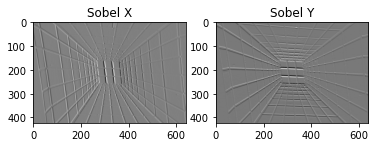

In [2]:
print("type 1 for lines, 2 for spiral, 3 for powerLines")
a=1
while True:
    a = input()
    try:
        a = int(a)
        if a>0 and a<4:
            break
        else:
            print("Please type either 1, 2, or 3")  
    except:
        print("Please type either 1, 2, or 3")
if a == 1:
    img = cv2.imread("lines.jpg")
elif a == 2:
    img = cv2.imread("spiral.jpg")
else:
    img = cv2.imread("powerLines.jpg")
img2=img.copy()
print("Press enter to update image or press TAB to turn on auto update")
bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(bw, (3,3), cv2.BORDER_DEFAULT)
x = cv2.Sobel(blur, cv2.CV_64F,1,0,ksize=3)
y = cv2.Sobel(blur, cv2.CV_64F,0,1,ksize=3)
plt.subplot(1,2,1),plt.imshow(x,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(1,2,2),plt.imshow(y,cmap = 'gray')
plt.title('Sobel Y')

Text(0.5, 1.0, 'Gradient')

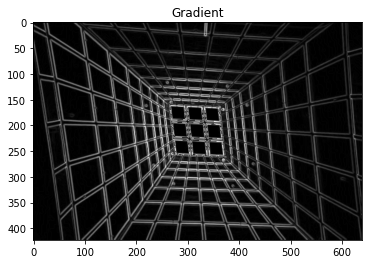

In [3]:
Gradient = np.zeros(img.shape, np.uint8)
for i in range(Gradient.shape[0]):
    for j in range(Gradient.shape[1]):
        Gradient[i][j] = math.sqrt((x[i][j])**2 + (y[i][j])**2)
Gradient = cv2.cvtColor(Gradient, cv2.COLOR_BGR2GRAY)
plt.imshow(Gradient, cmap = 'gray')
plt.title("Gradient")

In [4]:
def set_T(T):
    T = cv2.getTrackbarPos("T", "image")
    
def set_TL(*args):
    TL = cv2.getTrackbarPos("T", "Controls")

def set_TH(*args):
    TH = cv2.getTrackbarPos("T", "Controls")

In [5]:
def generalEdgeDetection(T, t):
    ret = Gradient.copy()
    for i in range(Gradient.shape[0]):
        for j in range(Gradient.shape[1]):
            if(ret[i][j] > T):
                ret[i][j] = 255
            else:
                ret[i][j] = 0
    return ret

In [6]:
edgedimg = Gradient.copy()
T = 0
autoUpdate = False
cv2.imshow("image", edgedimg)
cv2.createTrackbar("T", "image", 1, 255, set_T)
while True:
    cv2.imshow("image", edgedimg)
    key=cv2.waitKey(1)
    if key==9:
        autoUpdate = !autoupdate #Press tab to enable auto update when trackbar is changed
    if key==27: #if key pressed is esc
        break
    if key==13 or (T != cv2.getTrackbarPos("T","image") and autoUpdate): # press Enter or change trackbar
        T = cv2.getTrackbarPos("T","image")
        edgedimg = Gradient.copy()
        for i in range(Gradient.shape[0]):
            for j in range(Gradient.shape[1]):
                if(edgedimg[i][j] > T):
                    edgedimg[i][j] = 255
                else:
                    edgedimg[i][j] = 0
cv2.destroyAllWindows()

In [7]:
print("type 1 for lines, 2 for spiral,3 for powerLines")
while True:
    a = input()
    try:
        a = int(a)
        if a>0 and a<4:
            break
        else:
            print("Please type either 1, 2, or 3")  
    except:
        print("Please type either 1, 2, or 3")
if a == 1:
    img = cv2.imread("lines.jpg")
elif a == 2:
    img = cv2.imread("spiral.jpg")
else:
    img = cv2.imread("powerLines.jpg")
    
print("Press enter or change trackbar to update image")
canny = img.copy()
TH = 0
TL = 0
cv2.imshow("image", edgedimg)
cv2.createTrackbar("TH", "image", 1, 255, set_TH)
cv2.createTrackbar("TL", "image", 1, 255, set_TL)
while True:
    cv2.imshow("image", canny)
    key=cv2.waitKey(1)
    if key==27: #press esc to exit
        break
    if key==13 or TH != cv2.getTrackbarPos("TH", "image") or TL != cv2.getTrackbarPos("TL", "image"): # press Enter or change trackbar
        TH = cv2.getTrackbarPos("TH", "image")
        TL = cv2.getTrackbarPos("TL", "image")
        canny = cv2.Canny(img, TH, TL)
cv2.destroyAllWindows()

type 1 for lines, 2 for spiral,3 for powerLines
1
Press enter or change trackbar to update image


In [ ]:
total = Gradient.shape[0] * Gradient.shape[1]
canny = cv2.Canny(img2, 7, 51)
close=[]
for x in range(100):
    gen = generalEdgeDetection(x, Gradient.copy())
    same = 0
    print(x)
    for i in range(Gradient.shape[0]):
        for j in range(Gradient.shape[1]):
            if (gen[i][j] == canny[i][j]):
                same += 1
    close.append(same/total)
temp2 = np.linspace(0,1,len(close))
plt.figure

plt.plot(temp2,close)

plt.title('Similarity')
plt.xlabel('x')
plt.ylabel('Similarity')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


# 